In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data = pd.read_csv('wine.csv')

In [112]:
def find_outliers(mydata, column_name):
    q1 = np.quantile(mydata[column_name], 0.25)
    q3 = np.quantile(mydata[column_name], 0.75)
    iqr = q3 - q1
    mini = q1 - 1.5 * iqr
    maxi = q3 + 1.5 * iqr
    
    filtro = (mydata[column_name] < mini) | (mydata[column_name] > maxi)
    return mydata[filtro], filtro, mini, maxi, iqr

In [113]:
data = data.dropna()

In [114]:
data.describe()

,Unnamed: 0,points,price
count,11020.000000,11020.000000,11020.000000
mean,32621.808711,89.510163,41.188022
std,18901.937035,2.799172,26.419783
min,4.000000,80.000000,4.000000
25%,15863.750000,88.000000,25.000000
50%,32902.000000,90.000000,36.000000
75%,48747.250000,92.000000,50.000000
max,65488.000000,99.000000,750.000000


In [115]:
import numpy as np
outliers_precio, filtro, mini, maxi, iqr = find_outliers(data, 'price')

In [116]:
outliers_precio

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
60,60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi
168,168,US,"A fairly elegant expression of the variety, th...",Rector Creek Vineyard,91,95.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Duckhorn 2012 Rector Creek Vineyard Merlot (Na...,Merlot,Duckhorn
362,362,US,As impressive as the woman—a pioneer in the Na...,Jamie,95,200.0,California,Diamond Mountain District,Napa,Virginie Boone,@vboone,J. Davies 2012 Jamie Cabernet Sauvignon (Diamo...,Cabernet Sauvignon,J. Davies
513,513,US,"Big tannins support the layers of extracted, c...",El Adobo Ranch Vineyard,91,90.0,California,Chiles Valley,Napa,Virginie Boone,@vboone,Conn Creek 2013 El Adobo Ranch Vineyard Cabern...,Cabernet Sauvignon,Conn Creek
547,547,US,Deep aromas of dried strawberries and blueberr...,Stolpman Vineyard,93,150.0,California,Ballard Canyon,Central Coast,Matt Kettmann,@mattkettmann,Turiya 2011 Stolpman Vineyard Sangiovese (Ball...,Sangiovese,Turiya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64331,64331,US,"The 4% Petit Verdot in this dark, inky Caberne...",Jack's Masterpiece,91,125.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Hall 2011 Jack's Masterpiece Cabernet Sauvigno...,Cabernet Sauvignon,Hall
64443,64443,US,This 100% varietal wine is instantly compellin...,Communication Block,90,100.0,California,Mount Veeder,Napa,Virginie Boone,@vboone,Lampyridae 2012 Communication Block Cabernet S...,Cabernet Sauvignon,Lampyridae
64717,64717,US,"Dried blackberries, tar and pressed purple flo...",Grande Mélange,89,95.0,California,Temecula,South Coast,Matt Kettmann,@mattkettmann,Leoness 2012 Grande Mélange Red (Temecula),Red Blend,Leoness
65092,65092,US,This wine is a blend of Cabernet Sauvignon (65...,Harrison Hill,91,90.0,Washington,Snipes Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,DeLille 2013 Harrison Hill Red (Snipes Mountain),Bordeaux-style Red Blend,DeLille


In [119]:
moda = data['price'].mode()

In [121]:
data_nueva = outliers_precio.fillna(moda)

<Axes: ylabel='price'>

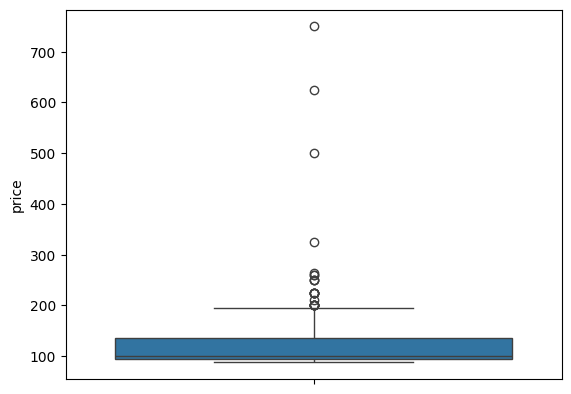

In [122]:
sns.boxplot(data['price'])

In [124]:
from scipy import stats


In [126]:
normalizado = stats.boxcox(data['price'])

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data['price'], ax=ax[0], kde=True)
sns.histplot(normalizado, ax=ax[1], kde=True)
plt.show()

KeyboardInterrupt: 

: 